In [364]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
import math

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [365]:
# Strip some of the white space from column names, and make lowercase for consistency
df = df.rename(str.strip, axis='columns')
df = df.rename(str.lower, axis='columns')

In [366]:
df.describe()

year  life expectancy  adult mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           alcohol  percentage expenditure  hepatitis b        measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               bmi  under-five deaths        polio  total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        diphtheria     hiv/aids            gdp    population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       income composition of resources    schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life expectancy                    2928 non-null float64
adult mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
hepatitis b                        2385 non-null float64
measles                            2938 non-null int64
bmi                                2904 non-null float64
under-five deaths                  2938 non-null int64
polio                              2919 non-null float64
total expenditure                  2712 non-null float64
diphtheria                         2919 non-null float64
hiv/aids                           2938 non-null

In [368]:
df[df['life expectancy'].isnull()]

country  year      status  life expectancy  \
624            Cook Islands  2013  Developing              NaN   
769                Dominica  2013  Developing              NaN   
1651       Marshall Islands  2013  Developing              NaN   
1716                 Monaco  2013  Developing              NaN   
1813                  Nauru  2013  Developing              NaN   
1910                   Niue  2013  Developing              NaN   
1959                  Palau  2013  Developing              NaN   
2168  Saint Kitts and Nevis  2013  Developing              NaN   
2217             San Marino  2013  Developing              NaN   
2713                 Tuvalu  2013  Developing              NaN   

      adult mortality  infant deaths  alcohol  percentage expenditure  \
624               NaN              0     0.01                0.000000   
769               NaN              0     0.01               11.419555   
1651              NaN              0     0.01              871.878317   
1716              NaN              0     0.01                0.000000   
1813              NaN              0     0.01               15.606596   
1910              NaN              0     0.01                0.000000   
1959              NaN              0      NaN              344.690631   
2168              NaN              0     8.54                0.000000   
2217              NaN              0     0.01                0.000000   
2713              NaN              0     0.01               78.281203   

      hepatitis b  measles  ...  polio  total expenditure  diphtheria  \
624          98.0        0  ...   98.0               3.58        98.0   
769          96.0        0  ...   96.0               5.58        96.0   
1651          8.0        0  ...   79.0              17.24        79.0   
1716         99.0        0  ...   99.0               4.30        99.0   
1813         87.0        0  ...   87.0               4.65        87.0   
1910         99.0        0  ...   99.0               7.20        99.0   
1959         99.0        0  ...   99.0               9.27        99.0   
2168         97.0        0  ...   96.0               6.14        96.0   
2217         69.0        0  ...   69.0               6.50        69.0   
2713          9.0        0  ...    9.0              16.61         9.0   

      hiv/aids          gdp  population  thinness  1-19 years  \
624        0.1          NaN         NaN                   0.1   
769        0.1   722.756650         NaN                   2.7   
1651       0.1  3617.752354         NaN                   0.1   
1716       0.1          NaN         NaN                   NaN   
1813       0.1   136.183210         NaN                   0.1   
1910       0.1          NaN         NaN                   0.1   
1959       0.1  1932.122370       292.0                   0.1   
2168       0.1          NaN         NaN                   3.7   
2217       0.1          NaN         NaN                   NaN   
2713       0.1  3542.135890      1819.0                   0.2   

      thinness 5-9 years  income composition of resources  schooling  
624                  0.1                              NaN        NaN  
769                  2.6                            0.721       12.7  
1651                 0.1                              NaN        0.0  
1716                 NaN                              NaN        NaN  
1813                 0.1                              NaN        9.6  
1910                 0.1                              NaN        NaN  
1959                 0.1                            0.779       14.2  
2168                 3.6                            0.749       13.4  
2217                 NaN                              NaN       15.1  
2713                 0.1                              NaN        0.0  

[10 rows x 22 columns]

Our observations for which we have NaN values for life expectancy are all in the year 2013. Since this is a time series dataset that goes through 2015, one would think that interpolating these values should be the best course of action. 

In [369]:
df[df.country == 'Dominica']

country  year      status  life expectancy  adult mortality  \
769  Dominica  2013  Developing              NaN              NaN   

     infant deaths  alcohol  percentage expenditure  hepatitis b  measles  \
769              0     0.01               11.419555         96.0        0   

     ...  polio  total expenditure  diphtheria  hiv/aids        gdp  \
769  ...   96.0               5.58        96.0       0.1  722.75665   

     population  thinness  1-19 years  thinness 5-9 years  \
769         NaN                   2.7                 2.6   

     income composition of resources  schooling  
769                            0.721       12.7  

[1 rows x 22 columns]

Unfortunately, all 10 of countries only had 1 year recorded.

In [370]:
df.country.value_counts()

Turkey                                16
Kiribati                              16
Kenya                                 16
Djibouti                              16
Pakistan                              16
Belgium                               16
Botswana                              16
Tonga                                 16
Burundi                               16
Gabon                                 16
Fiji                                  16
Saint Vincent and the Grenadines      16
Nicaragua                             16
Central African Republic              16
Poland                                16
Turkmenistan                          16
Liberia                               16
Peru                                  16
Haiti                                 16
Bangladesh                            16
Grenada                               16
Austria                               16
Oman                                  16
Barbados                              16
China           

Seeing as these are the only 10 countries in our dataset that do not have the full 16 years, I think it makes the most sense to remove them from the data set. We don't have a good value to impute. (I perform this towards the end, as it was causing some issues with some of my functions that iterate over the date frame)

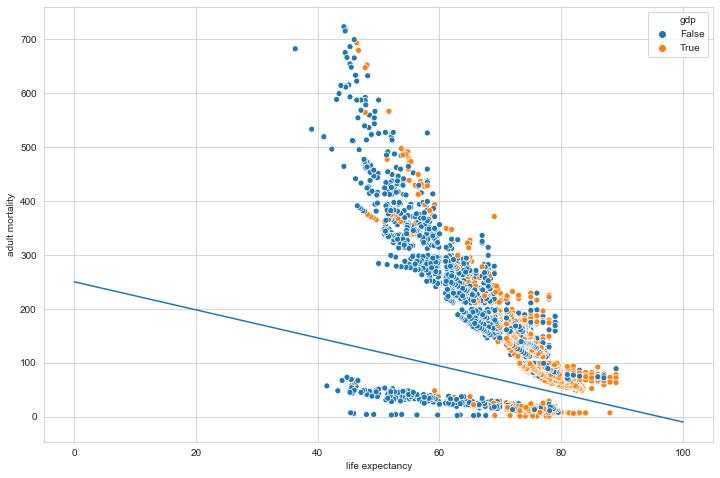

In [371]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(df['life expectancy'], df['adult mortality'], hue = df.gdp>1766)
plt.plot([0,100],[250,-10])

There are two separate trends that are off by a factor of 10. Given that adult mortality and life expectancy should display an extremely correlated relationship, I think measurement error is more likely than the existence of two identical but stratified trends.

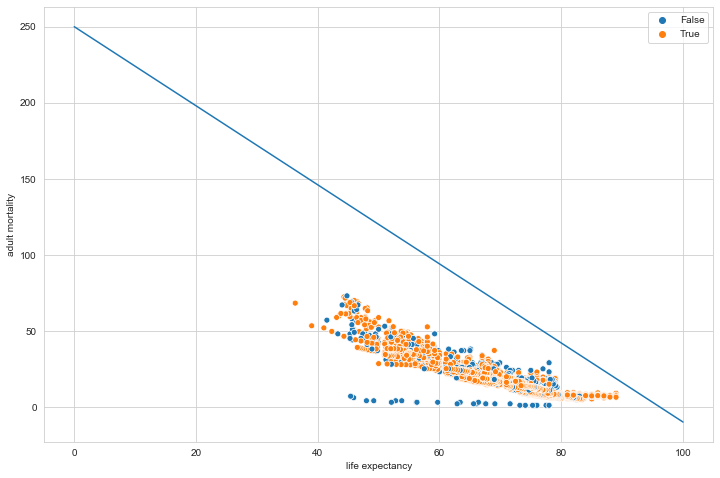

In [372]:
# line = -2.5x+250

above_line = (df['adult mortality'] > (250 - 2.5*df['life expectancy']))

for i in range(len(df)):
    try:
        if above_line[i]:
            df.iloc[i,4] /= 10
    except:
        pass
 

plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(df['life expectancy'], df['adult mortality'], hue = above_line)
plt.plot([0,100],[250,-10])

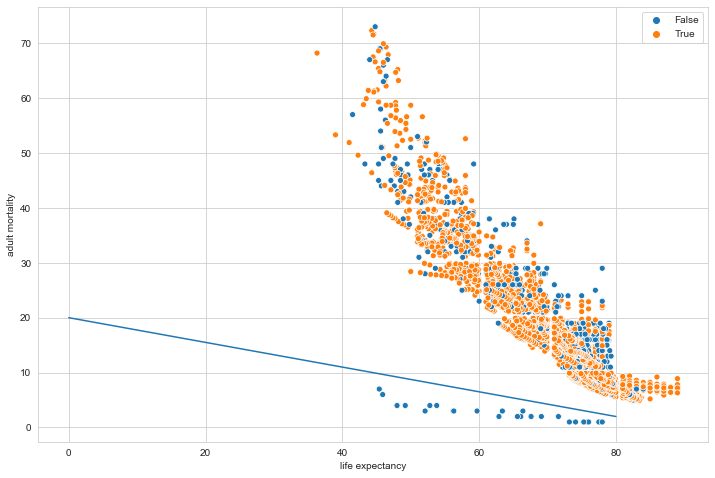

In [373]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(df['life expectancy'], df['adult mortality'], hue = above_line)
plt.plot([0,80],[20,2])

There is another set of points displaying a similar ten-fold relationship with the main group of points.

In [374]:
below_line = (df['adult mortality'] < (20 - .225*df['life expectancy']))

df[below_line]

country  year      status  life expectancy  \
13               Afghanistan  2002  Developing             56.2   
23                   Albania  2008  Developing             75.3   
210                 Barbados  2014  Developing             75.4   
255                  Belgium  2001   Developed             78.0   
330   Bosnia and Herzegovina  2006  Developing             75.7   
340                 Botswana  2012  Developing             63.4   
377        Brunei Darussalam  2007  Developing             76.0   
490                 Cameroon  2005  Developing             52.8   
542                     Chad  2001  Developing             48.0   
556                    Chile  2003  Developing             77.9   
637               Costa Rica  2003  Developing             78.0   
639               Costa Rica  2001  Developing             77.5   
904                     Fiji  2010  Developing             69.1   
929                  Finland  2001  Developing             78.0   
977                   Gambia  2001  Developing             56.3   
1106           Guinea-Bissau  2000  Developing             52.1   
1135                   Haiti  2003  Developing             59.7   
1193                   India  2009  Developing             66.0   
1380                Kiribati  2014  Developing             66.1   
1468                 Lebanon  2006  Developing             74.1   
1538               Lithuania  2000   Developed             71.6   
1771              Mozambique  2009  Developing             53.8   
1904                 Nigeria  2005  Developing             49.2   
1953                Pakistan  2005  Developing             62.9   
2145      Russian Federation  2006  Developing             66.4   
2243            Saudi Arabia  2006  Developing             73.2   
2253                 Senegal  2012  Developing             65.6   
2369         Solomon Islands  2007  Developing             67.6   
2370         Solomon Islands  2006  Developing             67.6   
2501               Swaziland  2003  Developing             45.9   
2665                 Tunisia  2015  Developing             75.3   
2931                Zimbabwe  2006  Developing             45.4   

      adult mortality  infant deaths  alcohol  percentage expenditure  \
13                3.0             88     0.01               16.887351   
23                1.0              1     5.61               36.622068   
210               1.0              0     8.82              294.905658   
255               1.0              1    11.01             2943.375396   
330               1.0              0     4.82               38.254141   
340               3.0              2     0.01               12.834474   
377               1.0              0     0.85             2048.557422   
490               4.0             58     5.03               73.032762   
542               4.0             42     0.30               26.874391   
556               1.0              2     6.37              584.099343   
637               1.0              1     4.04             1070.268999   
639               1.0              1     4.29              868.371359   
904               2.0              0     2.25               62.083435   
929               1.0              0     8.94             2775.335440   
977               3.0              3     2.25                0.000000   
1106              3.0              5     2.84                6.699419   
1135              3.0             18     6.64               44.256871   
1193              2.0           1300     2.50                0.844186   
1380              2.0              0     0.01               97.871933   
1468              1.0              1     1.82              534.579570   
1538              2.0              0     9.87              373.260553   
1771              4.0             70     1.18               39.752169   
1904              4.0            556     9.71                6.416253   
1953              2.0            364     0.04            

In [375]:
df[df.country=='Afghanistan']

country  year      status  life expectancy  adult mortality  \
0   Afghanistan  2015  Developing             65.0             26.3   
1   Afghanistan  2014  Developing             59.9             27.1   
2   Afghanistan  2013  Developing             59.9             26.8   
3   Afghanistan  2012  Developing             59.5             27.2   
4   Afghanistan  2011  Developing             59.2             27.5   
5   Afghanistan  2010  Developing             58.8             27.9   
6   Afghanistan  2009  Developing             58.6             28.1   
7   Afghanistan  2008  Developing             58.1             28.7   
8   Afghanistan  2007  Developing             57.5             29.5   
9   Afghanistan  2006  Developing             57.3             29.5   
10  Afghanistan  2005  Developing             57.3             29.1   
11  Afghanistan  2004  Developing             57.0             29.3   
12  Afghanistan  2003  Developing             56.7             29.5   
13  Afghanistan  2002  Developing             56.2              3.0   
14  Afghanistan  2001  Developing             55.3             31.6   
15  Afghanistan  2000  Developing             54.8             32.1   

    infant deaths  alcohol  percentage expenditure  hepatitis b  measles  ...  \
0              62     0.01               71.279624         65.0     1154  ...   
1              64     0.01               73.523582         62.0      492  ...   
2              66     0.01               73.219243         64.0      430  ...   
3              69     0.01               78.184215         67.0     2787  ...   
4              71     0.01                7.097109         68.0     3013  ...   
5              74     0.01               79.679367         66.0     1989  ...   
6              77     0.01               56.762217         63.0     2861  ...   
7              80     0.03               25.873925         64.0     1599  ...   
8              82     0.02               10.910156         63.0     1141  ...   
9              84     0.03               17.171518         64.0     1990  ...   
10             85     0.02                1.388648         66.0     1296  ...   
11             87     0.02               15.296066         67.0      466  ...   
12             87     0.01               11.089053         65.0      798  ...   
13             88     0.01               16.887351         64.0     2486  ...   
14             88     0.01               10.574728         63.0     8762  ...   
15             88     0.01               10.424960         62.0     6532  ...   

    polio  total expenditure  diphtheria  hiv/aids         gdp  population  \
0     6.0               8.16        65.0       0.1  584.259210  33736494.0   
1    58.0               8.18        62.0       0.1  612.696514    327582.0   
2    62.0               8.13        64.0       0.1  631.744976  31731688.0   
3    67.0               8.52        67.0       0.1  669.959000   3696958.0   
4    68.0               7.87        68.0       0.1   63.537231   2978599.0   
5    66.0               9.20        66.0       0.1  553.328940   2883167.0   
6    63.0               9.42        63.0       0.1  445.893298    284331.0   
7    64.0               8.33        64.0       0.1  373.361116   2729431.0   
8    63.0               6.73        63.0       0.1  369.835796  26616792.0   
9    58.0               7.43        58.0       0.1  272.563770   2589345.0   
10   58.0               8.70        58.0       0.1   25.294130    257798.0   
11    5.0               8.79         5.0       0.1  219.141353  24118979.0   
12   41.0               8.82        41.0       0.1  198.728544   2364851.0   
13   36.0               7.76        36.0       0.1  187.845950  21979923.0   
14   35.0               7.80        33.0       0.1  117.496980   2966463.0   
15   24.0               8.20        24.0       0.1  114.560000    293756.0   

    thinness  1-19 years  thinness 5-9 years  income composition of resources  \
0             

Adult mortality goes from 29.5 one year, to 3.0, to 31.6 the following year. I think it's almost certain that measurement error is the cause again. I decide to remove the set of points below the line as well.

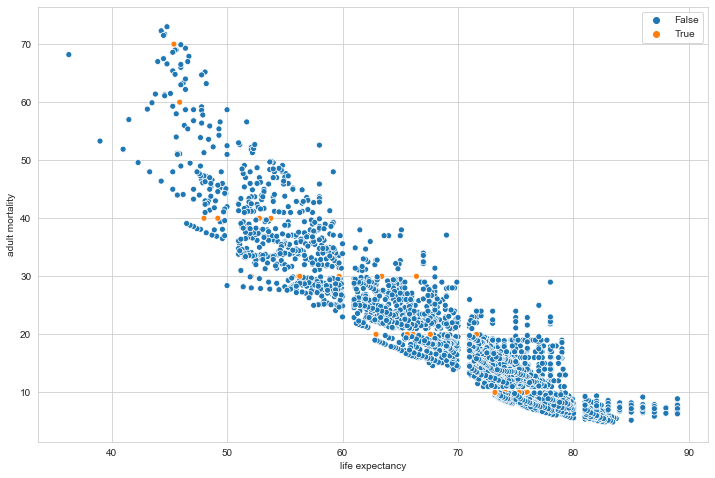

In [376]:
for i in range(len(df)):
    try:
        if below_line[i]:
            df.iloc[i,4] *= 10
    except:
        pass

plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.scatterplot(df['life expectancy'], df['adult mortality'], hue = below_line)


I went through each variable and produced a histogram and scatterplot against life expectancy. When appropriate, I performed a log or square root transformation to see if the data was easier to work with in that form. I explored Box-Coz transformations as well, but resulting distributions were chaotic in the examples I attempted.

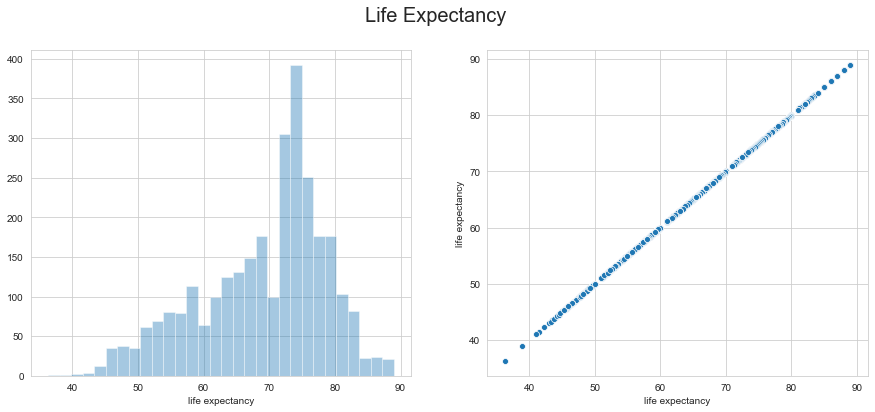

In [377]:
# Function that takes an input of a string and prints a histogram of the variable of that name,
# as well as a scatter plot against life expectancy.
def explore(var):
    plt.figure(figsize=(15,6))
    
    plt.suptitle(var.title(), size=20)

    plt.subplot(1,2,1)
    sns.distplot(df[var].dropna(), kde=False)

    plt.subplot(1,2,2)
    sns.scatterplot(df['life expectancy'], df[var])

    plt.show()

explore('life expectancy')

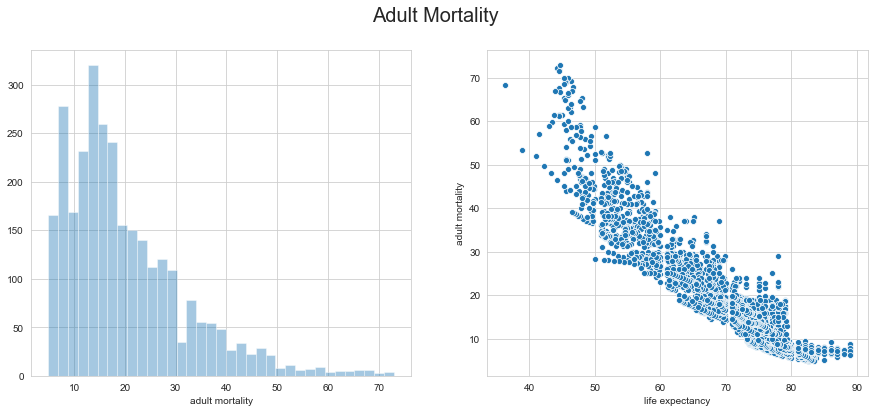

In [378]:
explore('adult mortality')

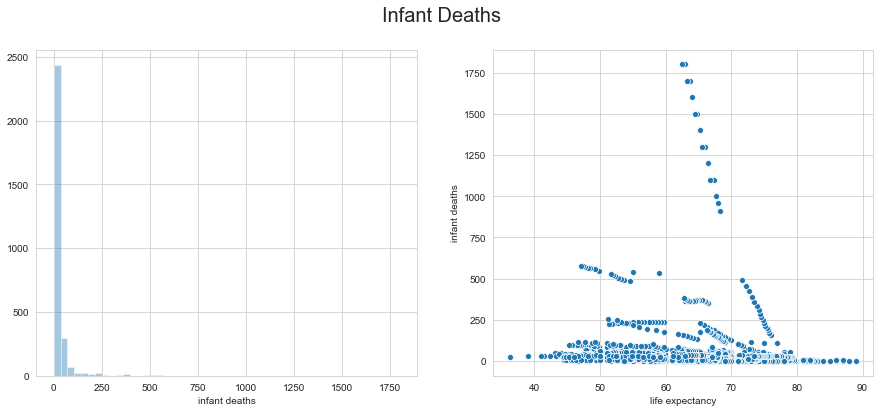

In [379]:
explore('infant deaths')

In [380]:
df[df['infant deaths']>250]

country  year      status  life expectancy  adult mortality  \
567      China  2008  Developing             74.5              9.7   
568      China  2007  Developing             74.4              9.6   
569      China  2006  Developing             74.2              9.8   
570      China  2005  Developing             73.9              9.9   
571      China  2004  Developing             73.5             11.0   
572      China  2003  Developing             73.1             13.0   
573      China  2002  Developing             72.7             16.0   
574      China  2001  Developing             72.2             11.0   
575      China  2000  Developing             71.7             11.5   
898   Ethiopia  2000  Developing             51.2             39.1   
1187     India  2015  Developing             68.3             18.1   
1188     India  2014  Developing             68.0             18.4   
1189     India  2013  Developing             67.6             18.7   
1190     India  2012  Developing             67.3             19.0   
1191     India  2011  Developing             66.8             19.3   
1192     India  2010  Developing             66.4             19.6   
1193     India  2009  Developing             66.0             20.0   
1194     India  2008  Developing             65.5             23.0   
1195     India  2007  Developing             65.2             26.0   
1196     India  2006  Developing             64.8             28.0   
1197     India  2005  Developing             64.4             21.1   
1198     India  2004  Developing             64.0             21.4   
1199     India  2003  Developing             63.7             21.6   
1200     India  2002  Developing             63.3             21.9   
1201     India  2001  Developing             62.9             22.2   
1202     India  2000  Developing             62.5             22.4   
1894   Nigeria  2015  Developing             54.5             34.4   
1895   Nigeria  2014  Developing             53.6             36.2   
1896   Nigeria  2013  Developing             53.2             36.7   
1897   Nigeria  2012  Developing             52.7             37.4   
1898   Nigeria  2011  Developing             52.3             37.5   
1899   Nigeria  2010  Developing             52.0             37.4   
1900   Nigeria  2009  Developing             51.6             37.6   
1901   Nigeria  2008  Developing             59.0             38.6   
1902   Nigeria  2007  Developing             55.0             38.8   
1903   Nigeria  2006  Developing             49.8             39.6   
1904   Nigeria  2005  Developing             49.2             40.0   
1905   Nigeria  2004  Developing             48.5             47.0   
1906   Nigeria  2003  Developing             48.1             41.0   
1907   Nigeria  2002  Developing             47.7             49.0   
1908   Nigeria  2001  Developing             47.4             48.0   
1909   Nigeria  2000  Developing             47.1             45.0   
1943  Pakistan  2015  Developing             66.4             16.1   
1944  Pakistan  2014  Developing             66.2             16.2   
1945  Pakistan  2013  Developing             66.0             16.3   
1946  Pakistan  2012  Developing             65.7             16.5   
1947  Pakistan  2011  Developing             65.5             16.7   
1948  Pakistan  2010  Developing             65.1             17.2   
1949  Pakistan  2009  Developing             64.8             17.5   
1950  Pakistan  2008  Developing             64.6             17.7   
1951  Pakistan  2007  Developing             64.4             17.8   
1952  Pakistan  2006  Developing             64.2             17.9   
1953  Pakistan  2005  Developing             62.9             20.0   
1954  Pakistan  2004  Developing             63.7             18.3   
1955  Pakistan  2003  Developing             63.5             18.5   
1956  Pakistan  2002  Developing             63.2             18.7   
1957  Pakistan  2

Zero values: 848


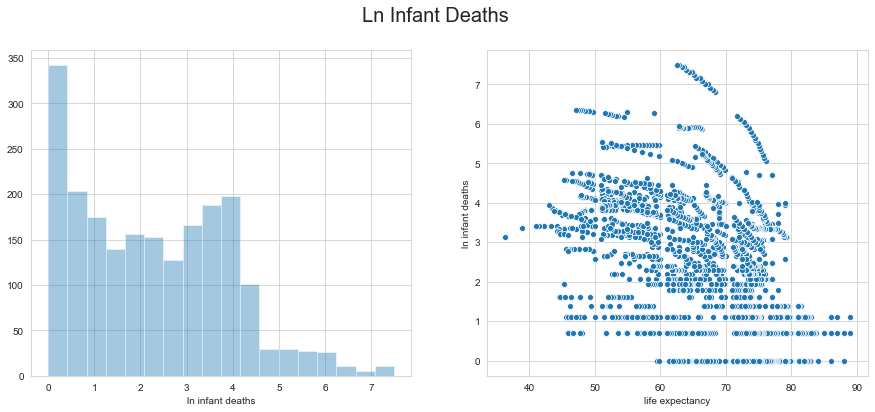

In [381]:
def make_log(var, keepzeroes=False):
    count=0
    newvar = 'ln ' + var
    for i in range(len(df)):
        if df.loc[i,var] == 0:
            if keepzeroes:
                count += 1
                df.loc[i,newvar] = .001
            else:
                count += 1
                df.loc[i,newvar] = None
        else:
            df.loc[i, newvar] = math.log(float(df.loc[i,var]))

    print('Zero values:',str(count))
            
make_log('infant deaths')
explore('ln infant deaths')

In [382]:
df[df['infant deaths']==0]

country  year      status  life expectancy  adult mortality  \
16                Albania  2015  Developing             77.8              7.4   
17                Albania  2014  Developing             77.5              8.0   
18                Albania  2013  Developing             77.2              8.4   
19                Albania  2012  Developing             76.9              8.6   
20                Albania  2011  Developing             76.6              8.8   
65    Antigua and Barbuda  2015  Developing             76.4             13.0   
66    Antigua and Barbuda  2014  Developing             76.2             13.1   
67    Antigua and Barbuda  2013  Developing             76.1             13.3   
68    Antigua and Barbuda  2012  Developing             75.9             13.4   
69    Antigua and Barbuda  2011  Developing             75.7             13.6   
70    Antigua and Barbuda  2010  Developing             75.6             13.8   
71    Antigua and Barbuda  2009  Developing             75.4             14.0   
72    Antigua and Barbuda  2008  Developing             75.2             14.2   
73    Antigua and Barbuda  2007  Developing             75.0             14.4   
74    Antigua and Barbuda  2006  Developing             74.8             14.5   
75    Antigua and Barbuda  2005  Developing             74.6             14.7   
76    Antigua and Barbuda  2004  Developing             74.4             14.9   
77    Antigua and Barbuda  2003  Developing             74.2             15.1   
78    Antigua and Barbuda  2002  Developing             74.0             15.3   
79    Antigua and Barbuda  2001  Developing             73.8             15.4   
80    Antigua and Barbuda  2000  Developing             73.6             15.6   
129               Austria  2015   Developed             81.5              6.5   
130               Austria  2014   Developed             81.4              6.6   
131               Austria  2013   Developed             81.1              6.8   
132               Austria  2012   Developed             88.0              7.0   
133               Austria  2011   Developed             88.0              7.3   
134               Austria  2010   Developed             84.0              7.5   
135               Austria  2009   Developed             82.0              7.7   
136               Austria  2008   Developed             84.0              7.6   
137               Austria  2007   Developed             81.0              8.0   
...                   ...   ...         ...              ...              ...   
2659  Trinidad and Tobago  2005  Developing             69.5             18.9   
2660  Trinidad and Tobago  2004  Developing             69.4             19.0   
2661  Trinidad and Tobago  2003  Developing             69.3             19.1   
2662  Trinidad and Tobago  2002  Developing             69.2             19.2   
2663  Trinidad and Tobago  2001  Developing             69.1             19.4   
2664  Trinidad and Tobago  2000  Developing             69.1             19.7   
2713               Tuvalu  2013  Developing              NaN              NaN   
2810              Uruguay  2015  Developing             77.0             11.6   
2811              Uruguay  2014  Developing             76.8             11.7   
2812              Uruguay  2013  Developing             76.8             11.7   
2813              Uruguay  2012  Developing             76.5             11.8   
2814              Uruguay  2011  Developing             77.0             11.1   
2815              Uruguay  2010  Developing             76.3             11.8   
2816              Uruguay  2009  Developing             76.6             11.8   
2842              Vanuatu  2015  Developing             72.0             13.0   
2843              Vanuatu  2014  Developing             71.7             13.4   
2844              Vanuatu  2013  Developing             71.6             13.5   
2845              Vanuatu  2012  Developing      

In [383]:
df[df.country=='Albania']

country  year      status  life expectancy  adult mortality  \
16  Albania  2015  Developing             77.8              7.4   
17  Albania  2014  Developing             77.5              8.0   
18  Albania  2013  Developing             77.2              8.4   
19  Albania  2012  Developing             76.9              8.6   
20  Albania  2011  Developing             76.6              8.8   
21  Albania  2010  Developing             76.2              9.1   
22  Albania  2009  Developing             76.1              9.1   
23  Albania  2008  Developing             75.3             10.0   
24  Albania  2007  Developing             75.9              9.0   
25  Albania  2006  Developing             74.2              9.9   
26  Albania  2005  Developing             73.5             15.0   
27  Albania  2004  Developing             73.0             17.0   
28  Albania  2003  Developing             72.8             18.0   
29  Albania  2002  Developing             73.3             15.0   
30  Albania  2001  Developing             73.6             14.0   
31  Albania  2000  Developing             72.6             11.0   

    infant deaths  alcohol  percentage expenditure  hepatitis b  measles  ...  \
16              0     4.60              364.975229         99.0        0  ...   
17              0     4.51              428.749067         98.0        0  ...   
18              0     4.76              430.876979         99.0        0  ...   
19              0     5.14              412.443356         99.0        9  ...   
20              0     5.37              437.062100         99.0       28  ...   
21              1     5.28               41.822757         99.0       10  ...   
22              1     5.79              348.055952         98.0        0  ...   
23              1     5.61               36.622068         99.0        0  ...   
24              1     5.58               32.246552         98.0       22  ...   
25              1     5.31                3.302154         98.0       68  ...   
26              1     5.16               26.993121         98.0        6  ...   
27              1     4.54              221.842800         99.0        7  ...   
28              1     4.29               14.719289         97.0        8  ...   
29              1     3.73              104.516916         96.0       16  ...   
30              1     4.25               96.205571         96.0       18  ...   
31              1     3.66               91.711541         96.0      662  ...   

    total expenditure  diphtheria  hiv/aids          gdp  population  \
16               6.00        99.0       0.1  3954.227830     28873.0   
17               5.88        98.0       0.1  4575.763787    288914.0   
18               5.66        99.0       0.1  4414.723140    289592.0   
19               5.59        99.0       0.1  4247.614380      2941.0   
20               5.71        99.0       0.1  4437.178680    295195.0   
21               5.34        99.0       0.1   494.358832    291321.0   
22               5.79        98.0       0.1  4114.136545   2927519.0   
23               5.87        99.0       0.1   437.539647   2947314.0   
24               6.10        98.0       0.1   363.136850     29717.0   
25               5.86        97.0       0.1    35.129300   2992547.0   
26               6.12        98.0       0.1   279.142931    311487.0   
27               6.38        97.0       0.1  2416.588235    326939.0   
28               6.27        97.0       0.1   189.681557    339616.0   
29               6.30        98.0       0.1  1453.642777      3511.0   
30               6.00        97.0       0.1  1326.973390     36173.0   
31               6.26        97.0       0.1  1175.788981     38927.0   

    thinness  1-19 years  thinness 5-9 years  income composition of resources  \
16                   1.2                 1.3                            0.762   
17                   1.2                 1.3                            0.761   
18                

In [384]:
df[df.country=='Uruguay']

country  year      status  life expectancy  adult mortality  \
2810  Uruguay  2015  Developing             77.0             11.6   
2811  Uruguay  2014  Developing             76.8             11.7   
2812  Uruguay  2013  Developing             76.8             11.7   
2813  Uruguay  2012  Developing             76.5             11.8   
2814  Uruguay  2011  Developing             77.0             11.1   
2815  Uruguay  2010  Developing             76.3             11.8   
2816  Uruguay  2009  Developing             76.6             11.8   
2817  Uruguay  2008  Developing             76.4             11.9   
2818  Uruguay  2007  Developing             75.4             12.4   
2819  Uruguay  2006  Developing             76.2             11.7   
2820  Uruguay  2005  Developing             75.7             12.3   
2821  Uruguay  2004  Developing             75.4             12.2   
2822  Uruguay  2003  Developing             75.4             12.1   
2823  Uruguay  2002  Developing             75.4             12.4   
2824  Uruguay  2001  Developing             75.2             12.3   
2825  Uruguay  2000  Developing             75.1             13.1   

      infant deaths  alcohol  percentage expenditure  hepatitis b  measles  \
2810              0      NaN                0.000000         95.0        0   
2811              0     6.03              463.639782         95.0        0   
2812              0     5.82              482.803945         94.0        0   
2813              0     5.77              339.719049         95.0        0   
2814              0     5.97              417.911744         95.0        0   
2815              0     6.21             2331.532804         95.0        0   
2816              0     6.67             1871.736563         95.0        0   
2817              1     6.76               24.731423         94.0        0   
2818              1     6.67               14.473059         94.0        0   
2819              1     6.58             1712.225506         95.0        0   
2820              1     6.35              152.544840         96.0        0   
2821              1     5.66              882.356362         94.0        0   
2822              1     5.11              160.840014         91.0        0   
2823              1     5.86               27.468810         95.0        0   
2824              1     6.48              421.480428         94.0        0   
2825              1     6.65              645.958382         92.0        0   

      ...  total expenditure  diphtheria  hiv/aids           gdp  population  \
2810  ...                NaN        95.0       0.1  15524.842470   3431552.0   
2811  ...               8.58        95.0       0.1  16737.898270   3419546.0   
2812  ...               8.68        94.0       0.1  16881.256800      3485.0   
2813  ...               8.74        95.0       0.1   1592.681900   3396777.0   
2814  ...               8.55        95.0       0.1  14166.499800   3385624.0   
2815  ...               8.63        95.0       0.1  11938.212000   3374415.0   
2816  ...               8.78        95.0       0.1   9415.173860   3362755.0   
2817  ...               8.17        94.0       0.1    962.312164    335824.0   
2818  ...               8.23        94.0       0.1     79.697460   3339741.0   
2819  ...              11.17        95.0       0.1   5877.876780    333143.0   
2820  ...              11.15        96.0       0.1    522.951116   3325612.0   
2821  ...              11.59        94.0       0.1   4117.388530    332496.0   
2822  ...               6.52        91.0       0.1   3622.522840   3325637.0   
2823  ...               7.18        95.0       0.1    488.768855   3327773.0   
2824  ...               7.46        94.0       0.1   6281.377470    332713.0   
2825  ...               7.82         9.0       0.1   6871.897677   3321245.0   

      thinness  1-19 years  thinness 5-9 years  \
2810                   1.5                 1.4   
2811                   1.5                 1

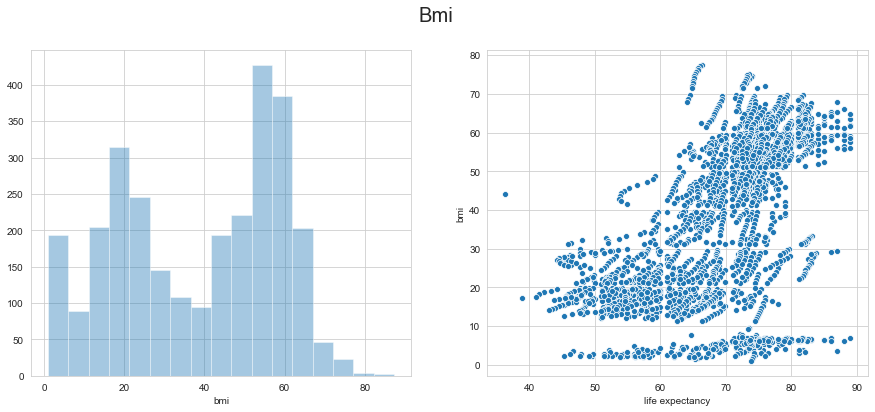

In [385]:
explore('bmi')

The bimodel distribution is strange, and values above 40 are pretty outlandish, especially for a national average. Still, the scatterplot doesn't look too suspicious, although values under 10 are also unrealistic, and there's a large cluster of those as well. It's possible it is being measured on a different scale than traditional BMI, although a cursory google search doesn't bring up anything along those lines. It appears that the cluster under 10 has a positive correlation as well, so it makes sense to multiply this cluster by 10 so that the values are in line with the rest of the distribution.

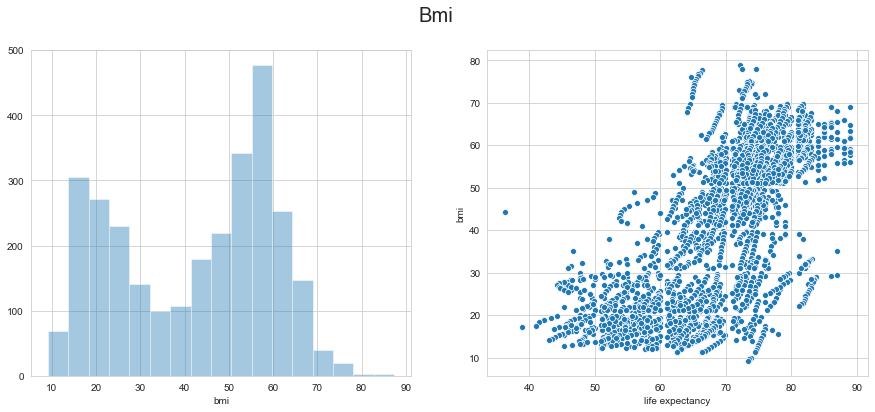

In [386]:
for i in range(len(df)):
    if df.loc[i, 'bmi'] < 8:
        df.loc[i, 'bmi'] *= 10
explore('bmi')

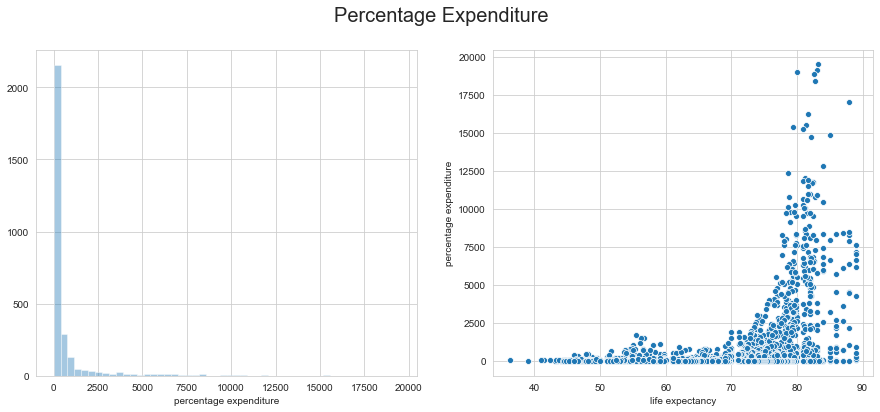

In [387]:
explore('percentage expenditure')

Zero values: 611


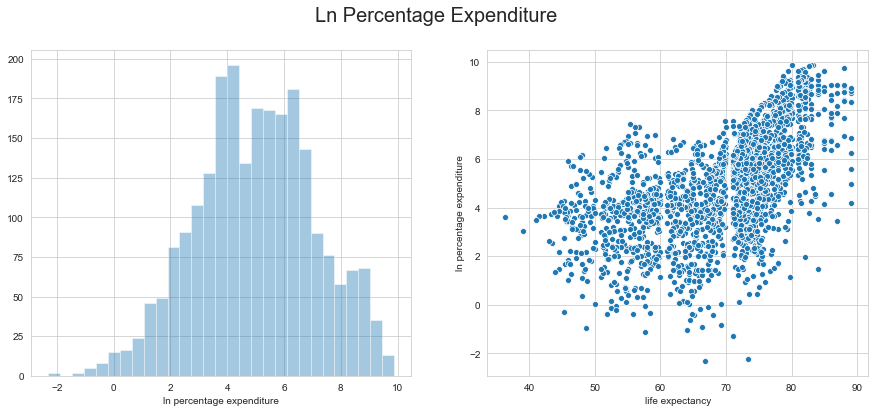

In [388]:
make_log('percentage expenditure')

explore('ln percentage expenditure')

There's a crazy number of values above 100 (ln(100)=4.6, so roughly half of our values), so it seems like this variable is unlikely to represent an actual percentage. The log of this variable is a relatively normal distribution which is highly correlated with our target variable.

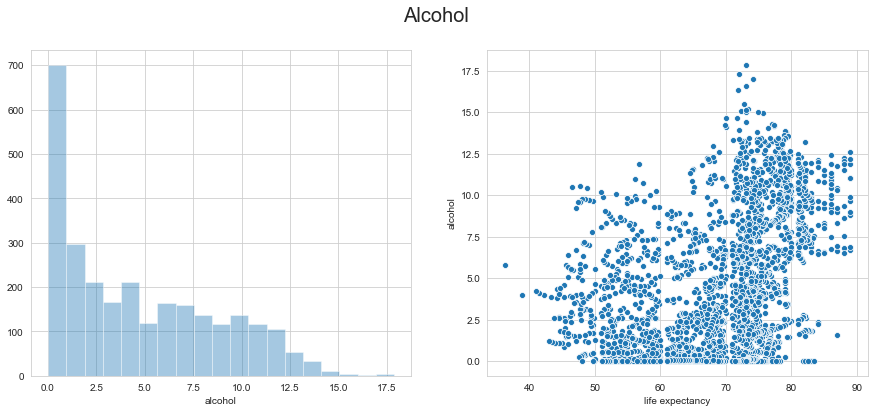

In [389]:
explore('alcohol')

Zero values: 0


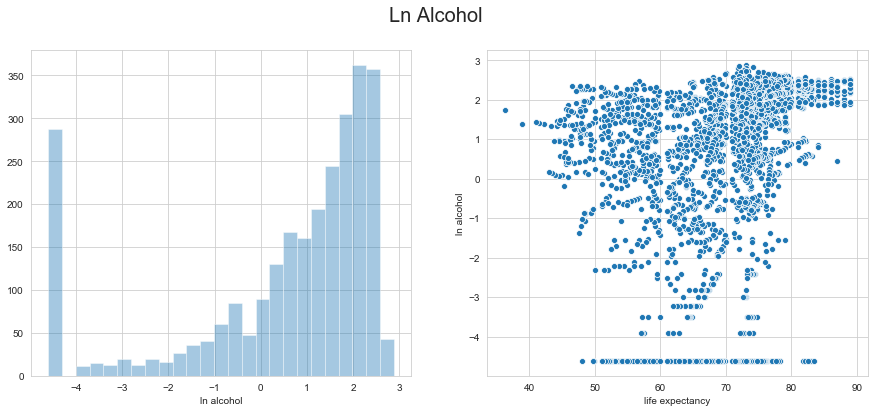

In [390]:
make_log('alcohol')

explore('ln alcohol')

0


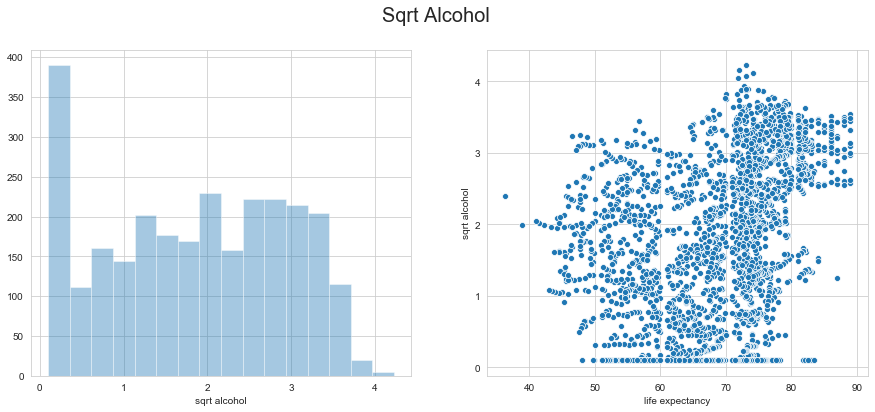

In [391]:
count=0
for i in range(len(df)):
    if df.loc[i,'alcohol'] < 0:
        count += 1
        df.loc[i,'sqrt alcohol'] = -math.sqrt(abs(df.loc[i,'alcohol']))
    else:
        df.loc[i,'sqrt alcohol'] = math.sqrt(float(df.loc[i,'alcohol']))
        
print(count)

explore('sqrt alcohol')

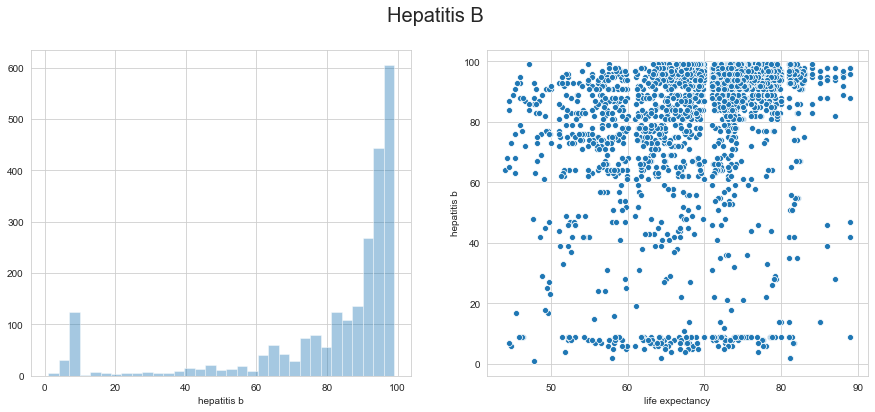

In [392]:
explore('hepatitis b')

In [393]:
max(df['hepatitis b'])

99.0

It's difficult to provide intuition for that result. It looks like the variable is topcoded at 99, which would make sense if the variable is a percentage, but 99% of a country having Hepatitis B seems absurd.

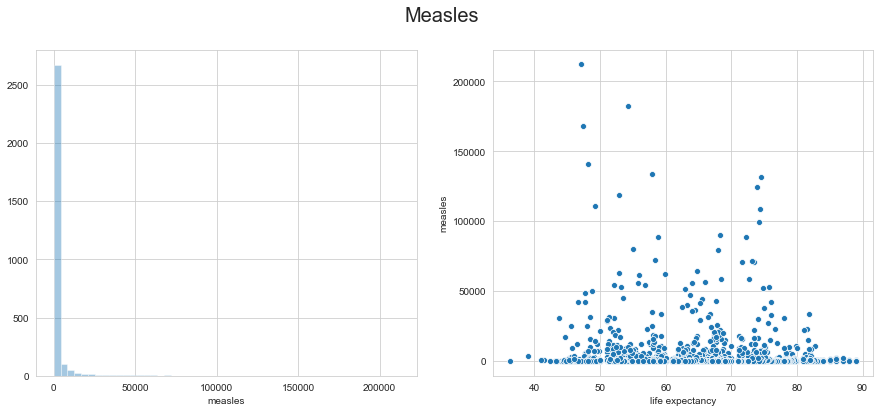

In [394]:
explore('measles')

Zero values: 983


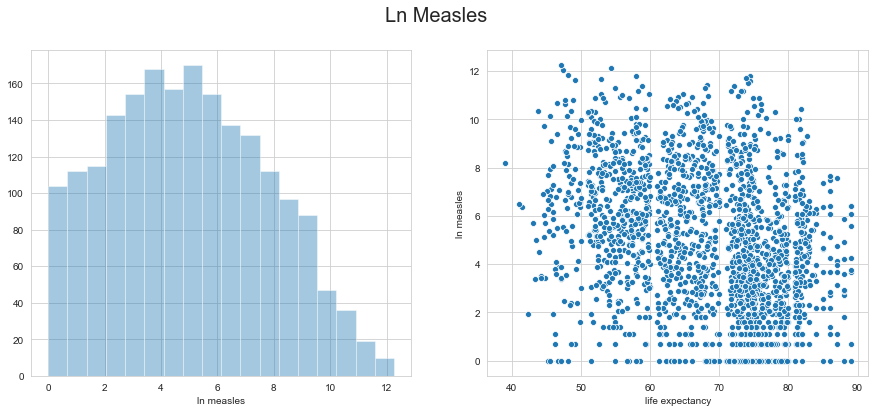

In [395]:
make_log('measles')

explore('ln measles')

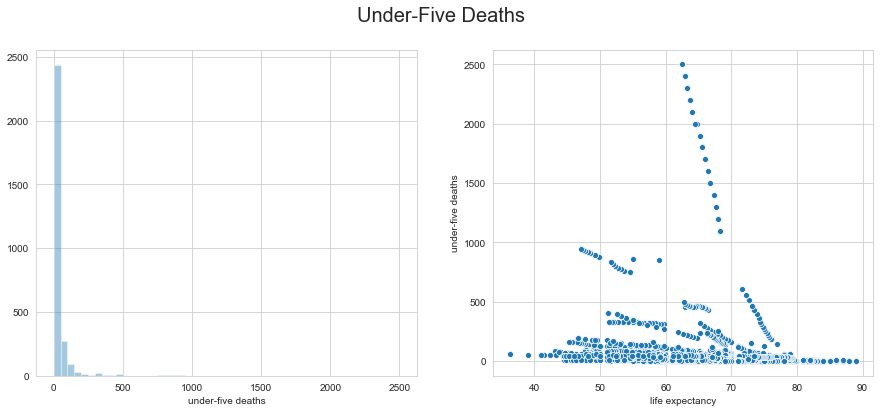

In [396]:
explore('under-five deaths')

Zero values: 785


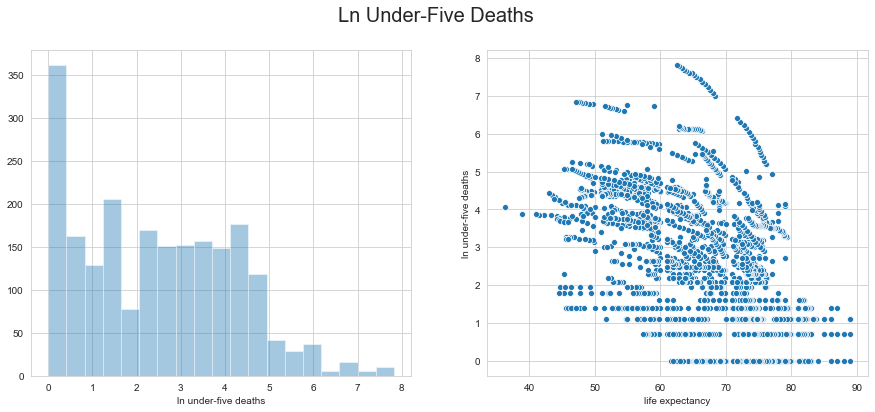

In [397]:
make_log('under-five deaths')

explore('ln under-five deaths')

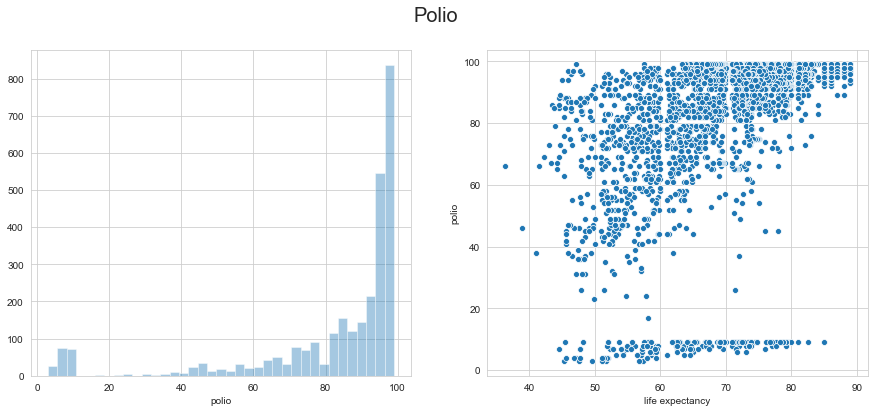

In [398]:
explore('polio')

It seems highly likely that we have another scaling error. There are a group of observations that appear to be topcoded at 10 (while the rest has a maximum at 99 or 100), that display an identical pattern to the rest of the data, except that they are off by a scale of 10.

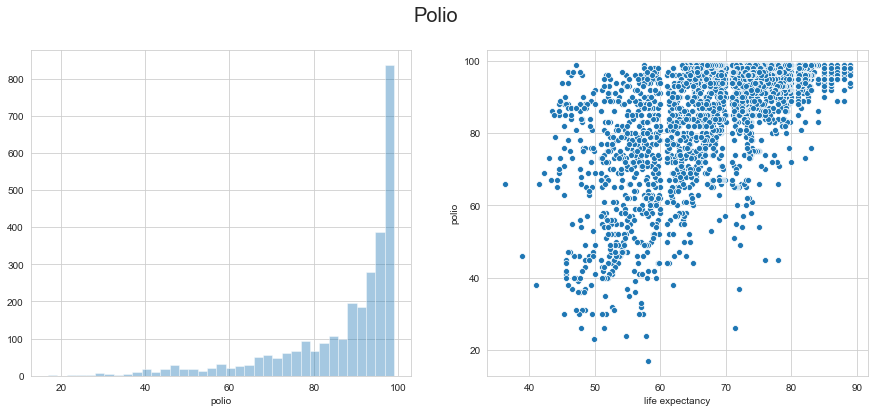

In [399]:
for i in range(len(df)):
    if df.loc[i, 'polio'] < 10:
        df.loc[i, 'polio'] *= 10
explore('polio')

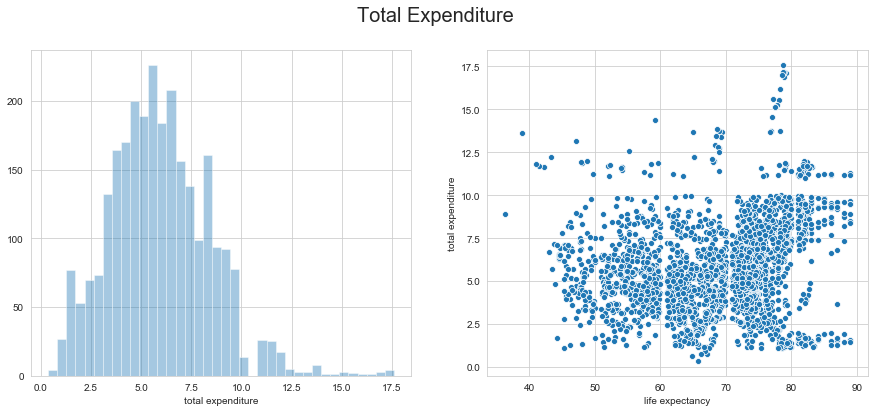

In [400]:
explore('total expenditure')

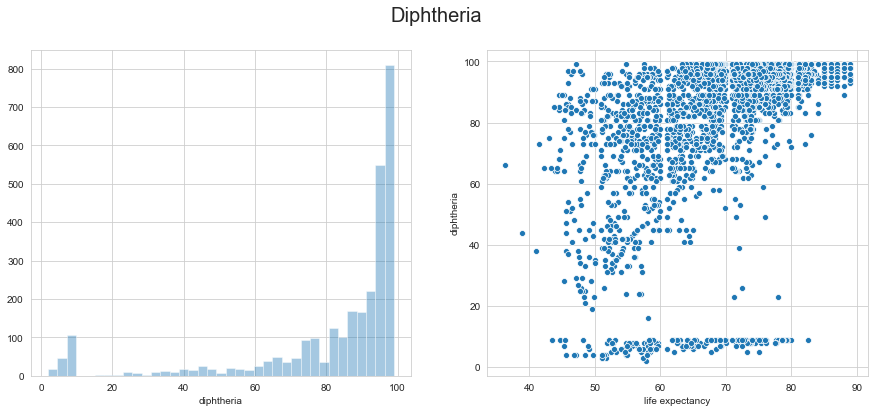

In [401]:
explore('diphtheria')

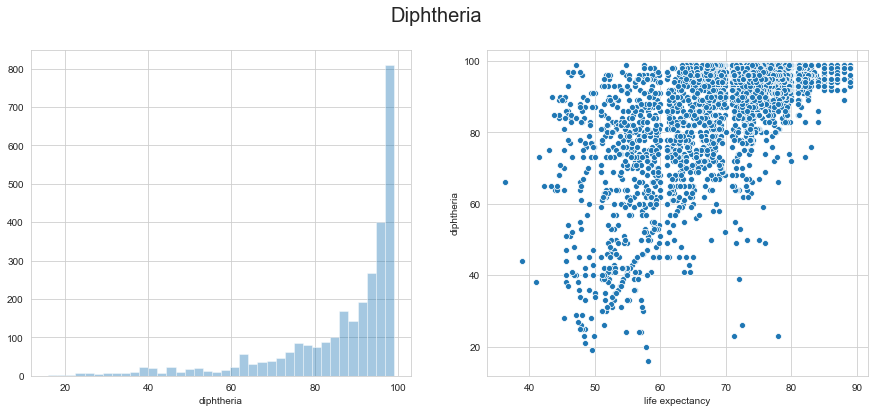

In [402]:
for i in range(len(df)):
    if df.loc[i, 'diphtheria'] < 10:
        df.loc[i, 'diphtheria'] *= 10
explore('diphtheria')

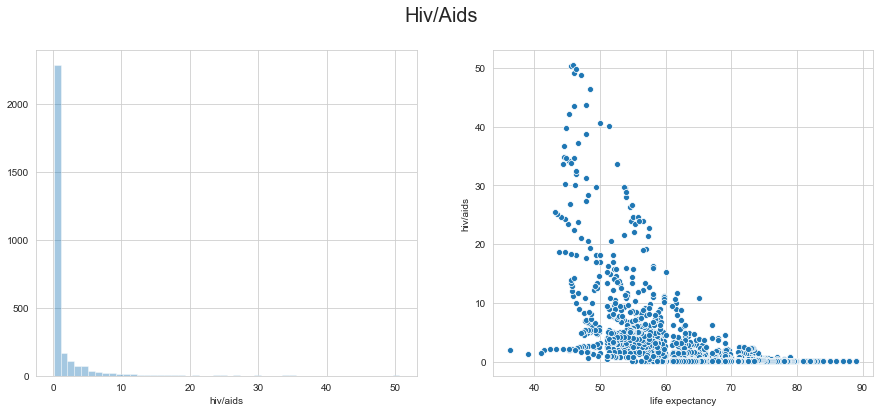

In [403]:
explore('hiv/aids')

Zero values: 0


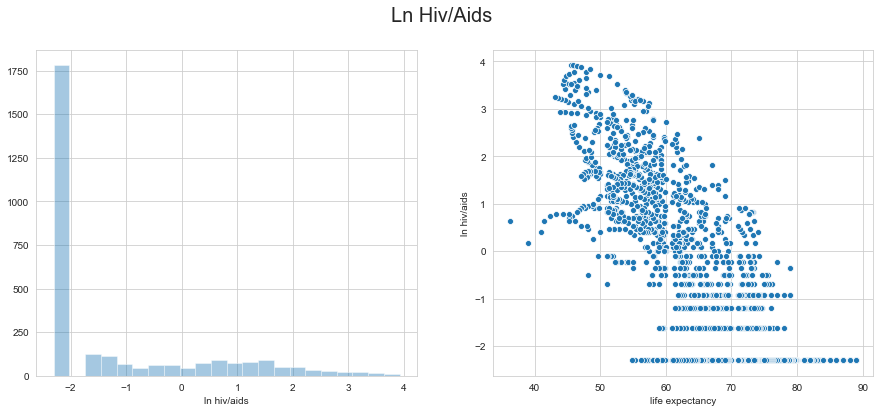

In [404]:
make_log('hiv/aids')
explore('ln hiv/aids')

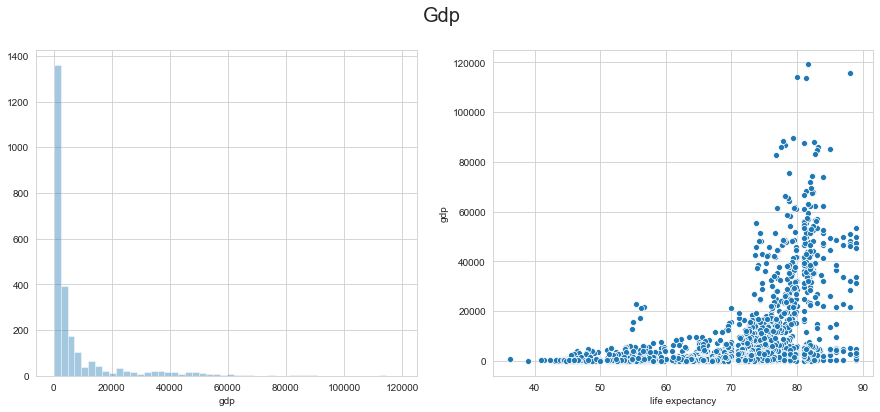

In [405]:
explore('gdp')

Zero values: 0


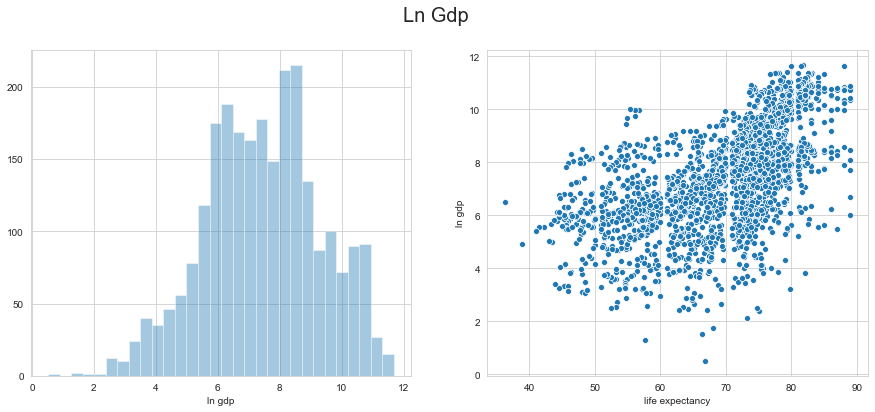

In [406]:
make_log('gdp')
explore('ln gdp')

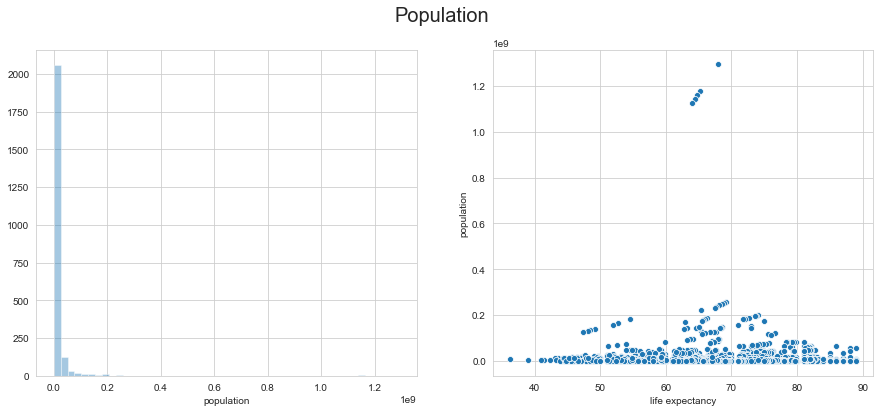

In [407]:
explore('population')

Zero values: 0


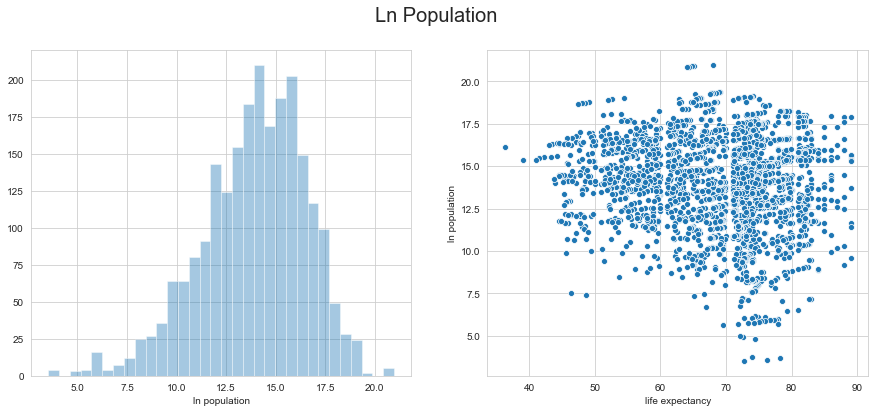

In [408]:
make_log('population')
explore('ln population')

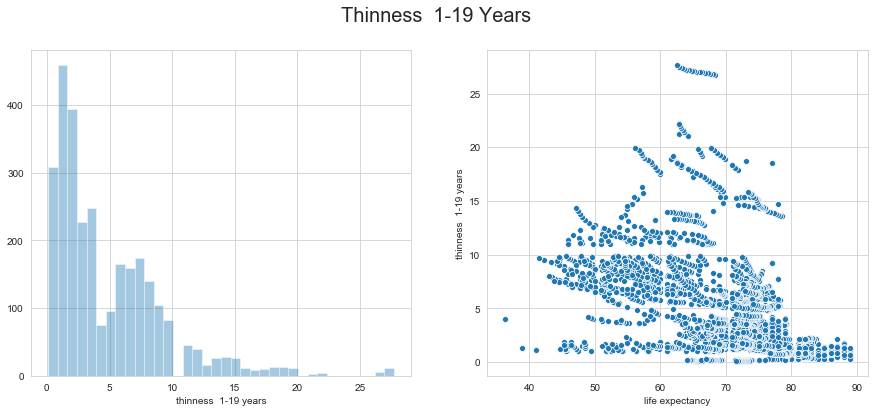

In [409]:
explore('thinness  1-19 years')

Zero values: 0


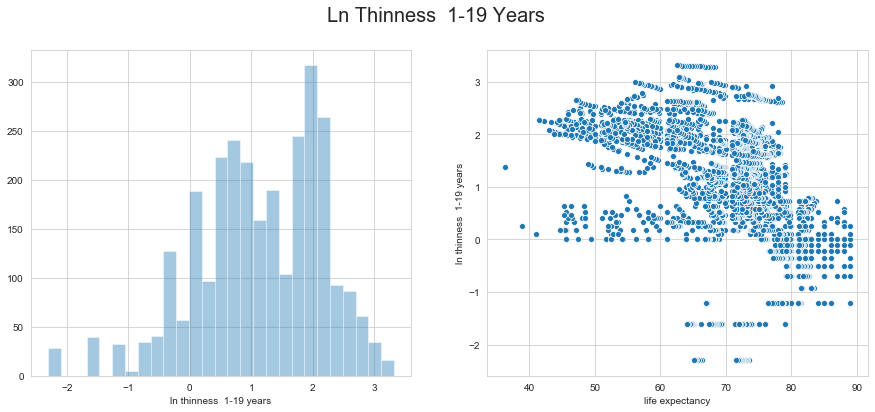

In [410]:
make_log('thinness  1-19 years')
explore('ln thinness  1-19 years')

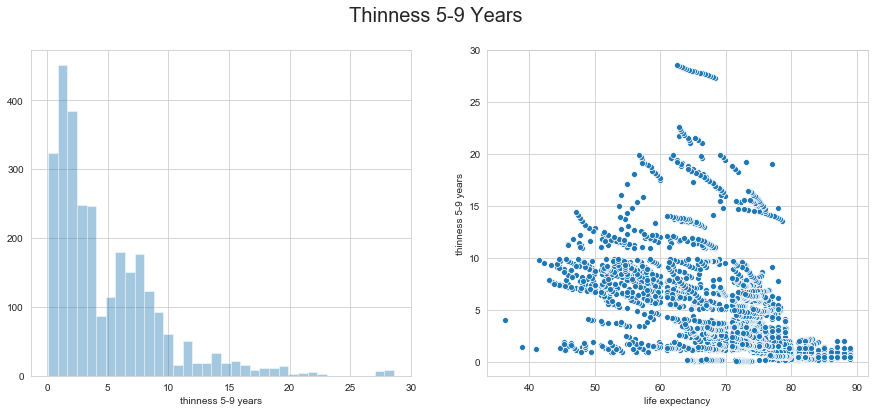

In [411]:
explore('thinness 5-9 years')

Zero values: 0


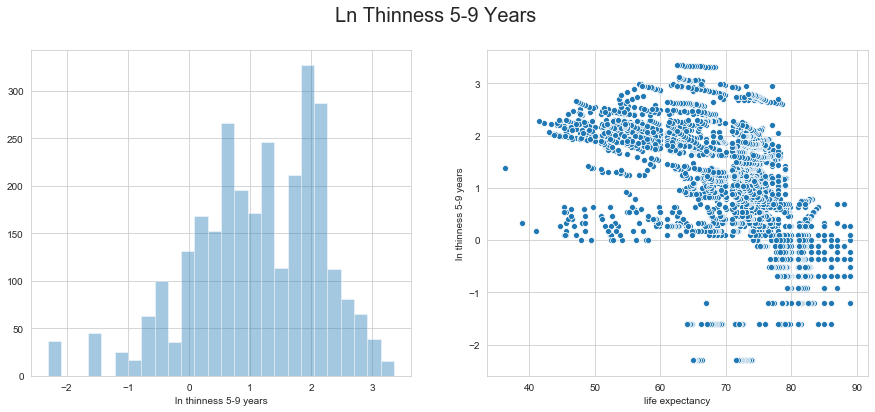

In [412]:
make_log('thinness 5-9 years')
explore('ln thinness 5-9 years')

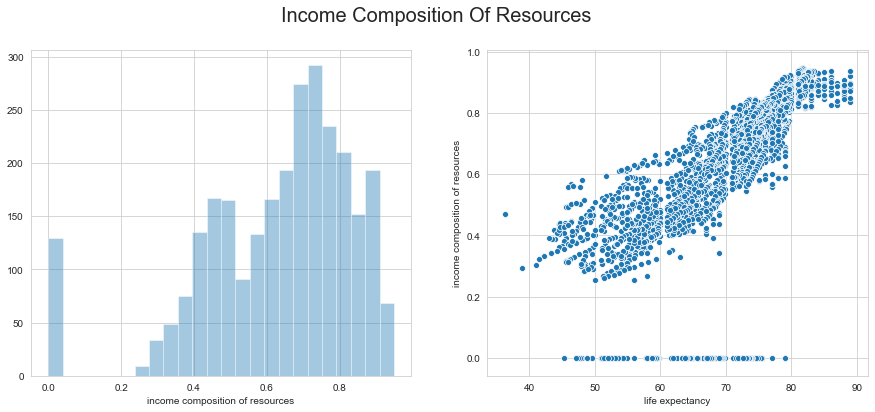

In [413]:
explore('income composition of resources')

In [414]:
df[df['income composition of resources']==0][:30]

country  year      status  life expectancy  \
75      Antigua and Barbuda  2005  Developing             74.6   
76      Antigua and Barbuda  2004  Developing             74.4   
77      Antigua and Barbuda  2003  Developing             74.2   
78      Antigua and Barbuda  2002  Developing             74.0   
79      Antigua and Barbuda  2001  Developing             73.8   
80      Antigua and Barbuda  2000  Developing             73.6   
176                 Bahamas  2000  Developing             72.6   
294                  Bhutan  2010  Developing             67.9   
295                  Bhutan  2009  Developing             67.4   
296                  Bhutan  2008  Developing             67.0   
297                  Bhutan  2007  Developing             66.5   
298                  Bhutan  2006  Developing             65.8   
299                  Bhutan  2005  Developing             65.0   
300                  Bhutan  2004  Developing             64.2   
301                  Bhutan  2003  Developing             63.3   
302                  Bhutan  2002  Developing             62.5   
303                  Bhutan  2001  Developing             61.7   
304                  Bhutan  2000  Developing             62.0   
331  Bosnia and Herzegovina  2005  Developing             75.0   
332  Bosnia and Herzegovina  2004  Developing             75.5   
333  Bosnia and Herzegovina  2003  Developing             75.2   
334  Bosnia and Herzegovina  2002  Developing             75.4   
335  Bosnia and Herzegovina  2001  Developing             74.9   
336  Bosnia and Herzegovina  2000  Developing             74.6   
411            Burkina Faso  2005  Developing             53.3   
412            Burkina Faso  2004  Developing             52.4   
413            Burkina Faso  2003  Developing             51.6   
414            Burkina Faso  2002  Developing             51.0   
415            Burkina Faso  2001  Developing             56.0   
416            Burkina Faso  2000  Developing             51.0   

     adult mortality  infant deaths  alcohol  percentage expenditure  \
75              14.7              0     8.15             1455.608186   
76              14.9              0     7.28               22.862952   
77              15.1              0     7.16             1158.065259   
78              15.3              0     7.21              927.407585   
79              15.4              0     7.51              163.767698   
80              15.6              0     7.27             1127.743470   
176             19.2              0    12.15                0.000000   
294             22.8              1     0.28              244.039195   
295             23.2              1     0.17               27.489070   
296             23.4              1     0.21              302.667579   
297             23.8              1     0.16              283.806236   
298             24.5              1     0.29              169.202397   
299             25.4              1     0.73              145.596544   
300             26.3              1     0.96                2.586698   
301             27.3              1     0.52               19.156641   
302             28.2              1     0.29              151.975519   
303             29.0              1     0.14                8.574030   
304             31.2              1     0.17               93.358728   
331             12.0              0     4.56               45.713543   
332              9.9              0     4.25                3.479919   
333             12.0              0     4.14               39.865180   
334             11.0              0     3.84              151.139930   
335             11.3              0     3.85              143.294749   
336             11.6              0     3.64              165.616864   
411             31.3             48     4.88                8.769989   
412             32.3             49     4.54               56.961081   
413             33.2         

In [415]:
for i in range(len(df)):
    if df.loc[i, 'income composition of resources'] == 0:
        df.loc[i, 'income composition of resources'] = None

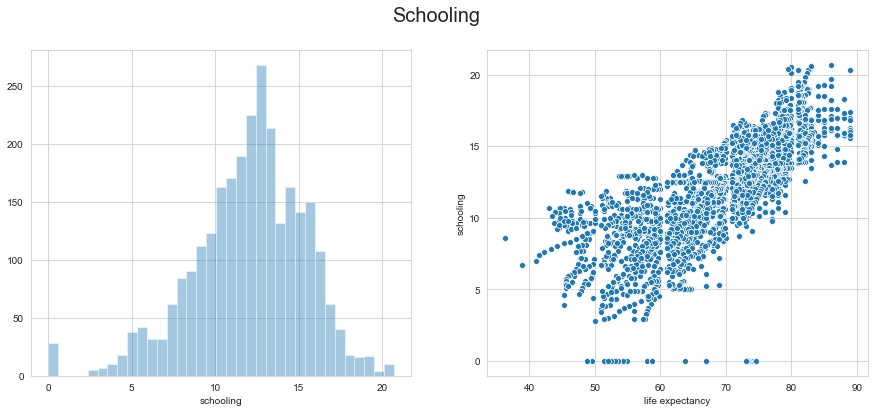

In [416]:
explore('schooling')

In [417]:
for i in range(len(df)):
    if df.loc[i, 'schooling'] == 0:
        df.loc[i, 'schooling'] = None


In [418]:
# Remove observations for which our target variable is missing
df = df[df['life expectancy'].isnull()==False]

# Impure column mean where we have missing values
df_imputed = df.fillna(df.mean())

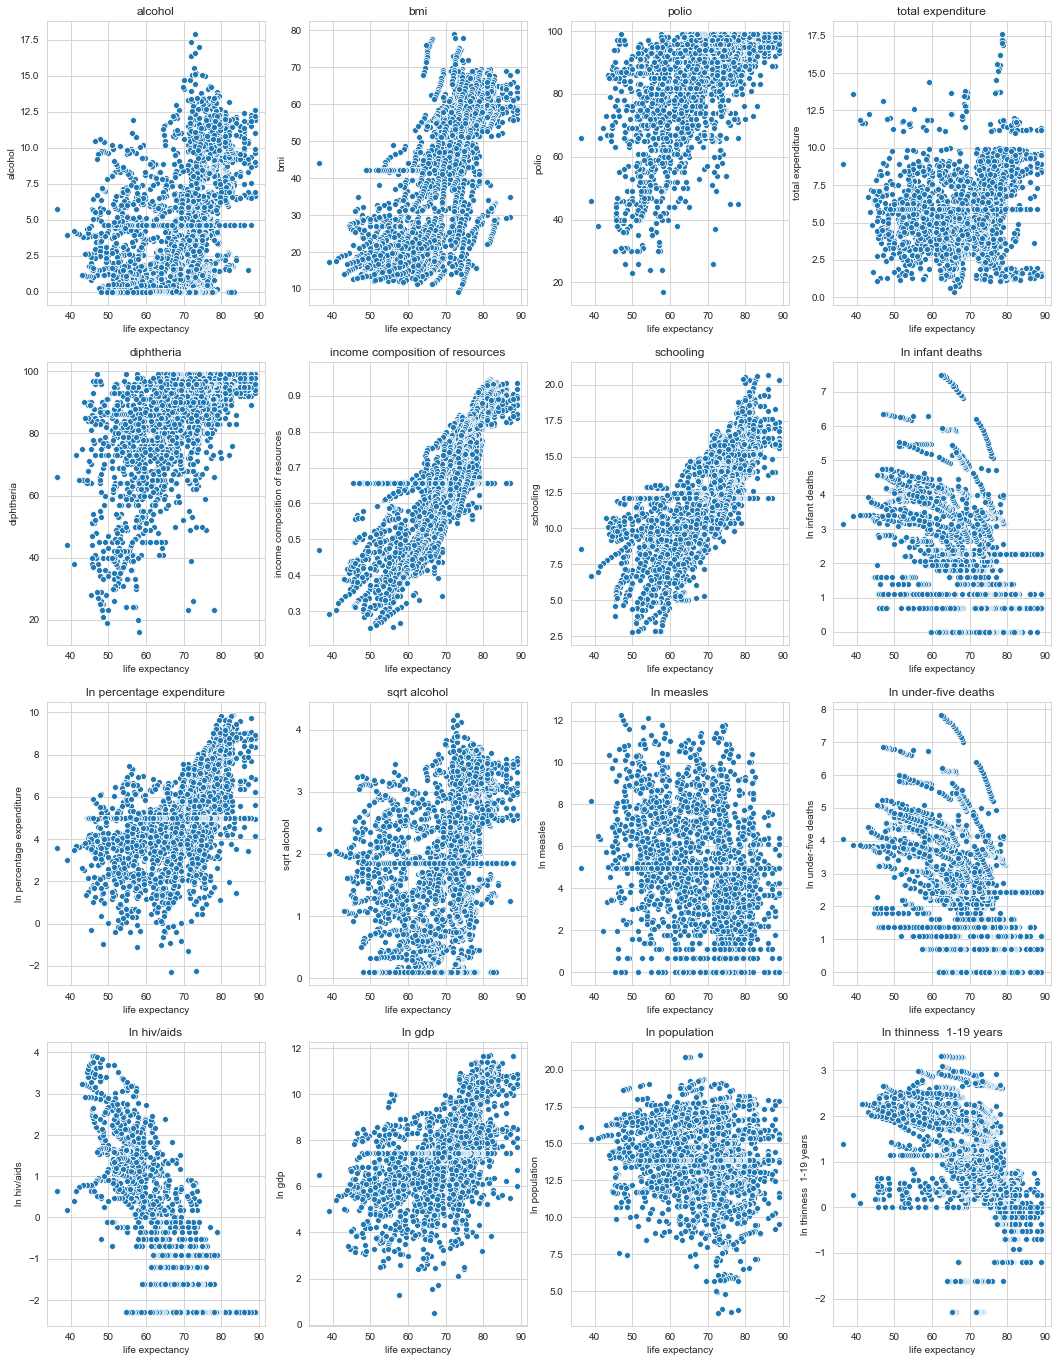

In [419]:
num_cols = [6,10,12,13,14,20,21,22,23,25,26,27,28,29,30,31]

len(num_cols)
plt.figure(figsize = (18,24))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.title(df_imputed.columns[num_cols[i]])
    sns.scatterplot(df_imputed['life expectancy'], df_imputed.iloc[:,num_cols[i]])

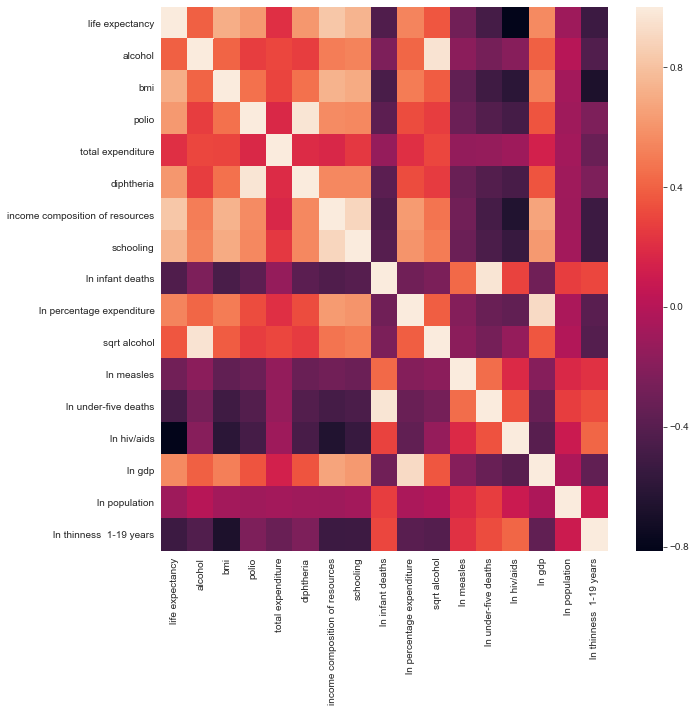

In [420]:
hm_cols = [3,6,10,12,13,14,20,21,22,23,25,26,27,28,29,30,31]

plt.figure(figsize=(10,10))
df_corr = df_imputed.iloc[:,hm_cols]
sns.heatmap(df_corr.corr())

In [421]:
df_corr.corr()['life expectancy']

life expectancy                    1.000000
alcohol                            0.392420
bmi                                0.709896
polio                              0.619915
total expenditure                  0.209628
diphtheria                         0.615773
income composition of resources    0.825926
schooling                          0.742930
ln infant deaths                  -0.435087
ln percentage expenditure          0.537927
sqrt alcohol                       0.359722
ln measles                        -0.282306
ln under-five deaths              -0.487524
ln hiv/aids                       -0.813386
ln gdp                             0.558282
ln population                     -0.102093
ln thinness  1-19 years           -0.525467
Name: life expectancy, dtype: float64

The variables that were most closely correlated with life expectancy were "Income composition of Resources," "Schooling," and "HIV/AIDS." These were substantially more correlated than log of GDP, which is fairly profound.

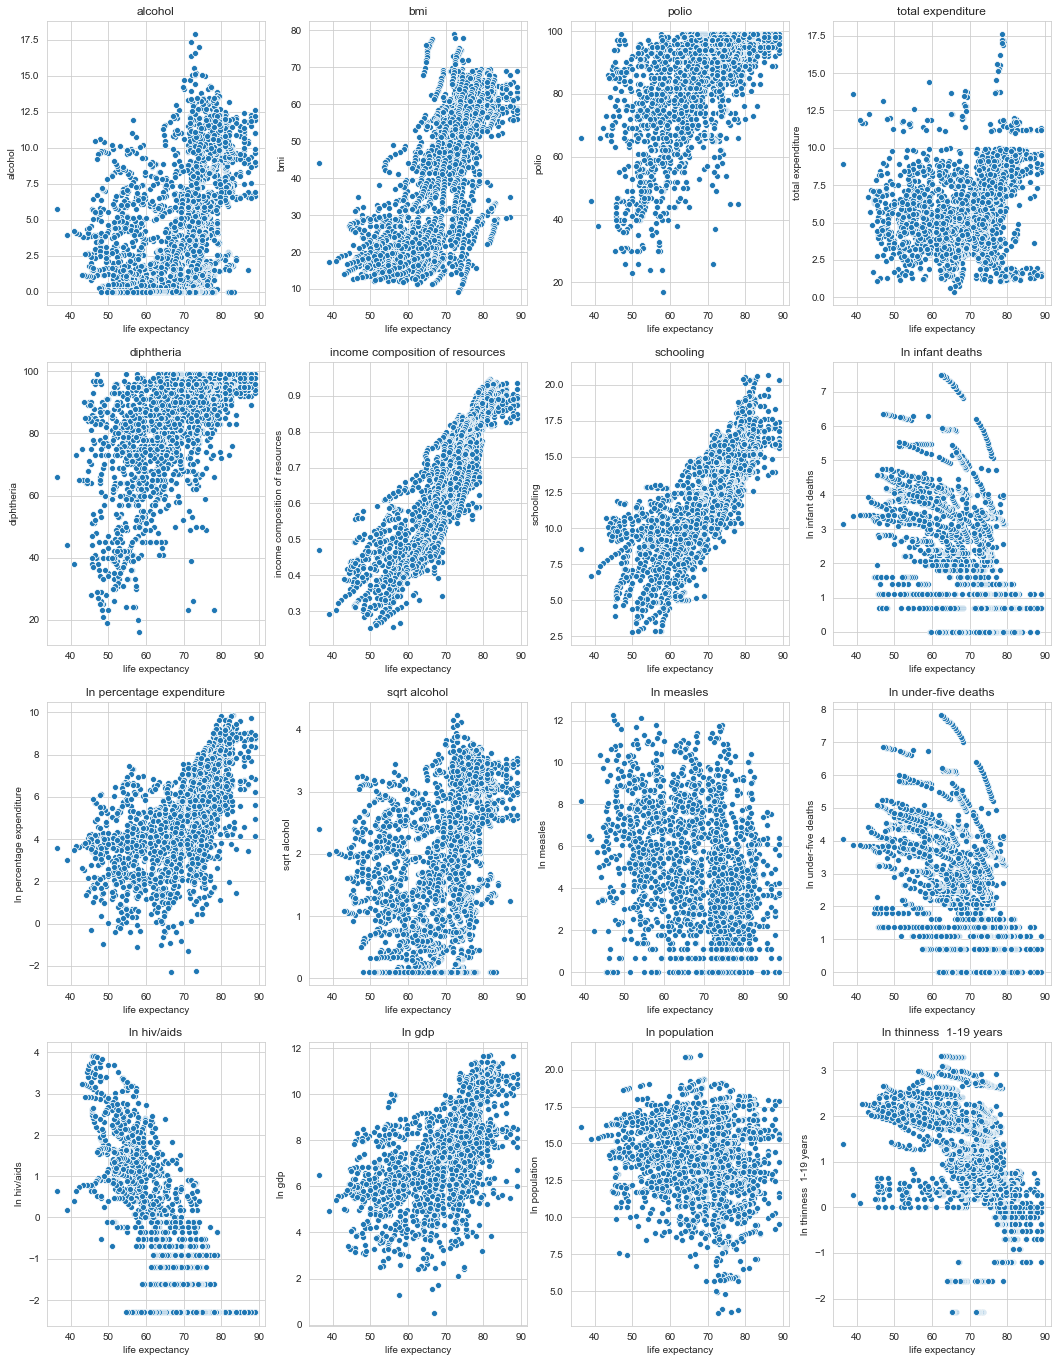

In [422]:
num_cols = [6,10,12,13,14,20,21,22,23,25,26,27,28,29,30,31]

len(num_cols)
plt.figure(figsize = (18,24))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.title(df.columns[num_cols[i]])
    sns.scatterplot(df['life expectancy'], df.iloc[:,num_cols[i]])

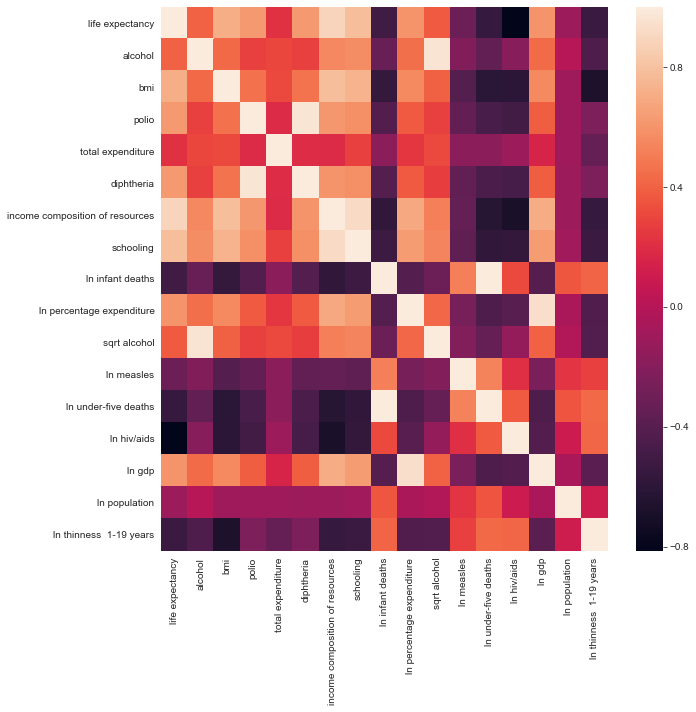

In [423]:
hm_cols = [3,6,10,12,13,14,20,21,22,23,25,26,27,28,29,30,31]

plt.figure(figsize=(10,10))
df_corr = df.iloc[:,hm_cols]
sns.heatmap(df_corr.corr())

In [424]:
df_corr.corr()['life expectancy']

life expectancy                    1.000000
alcohol                            0.404877
bmi                                0.716510
polio                              0.623887
total expenditure                  0.218086
diphtheria                         0.619718
income composition of resources    0.888599
schooling                          0.783514
ln infant deaths                  -0.502150
ln percentage expenditure          0.596970
sqrt alcohol                       0.371141
ln measles                        -0.315395
ln under-five deaths              -0.554894
ln hiv/aids                       -0.813386
ln gdp                             0.598355
ln population                     -0.112023
ln thinness  1-19 years           -0.530363
Name: life expectancy, dtype: float64

Our main results did not change when we removed our missing values, rather than impute the column mean.